In [6]:
import dlib #http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
import cv2
import matplotlib.pyplot as plt

In [7]:
# helper function 
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [17]:
class LandmarkExtractor():
	def __init__(self, predictor_path):
		self.predictor = dlib.shape_predictor(predictor_path)
		self.detector = dlib.get_frontal_face_detector()
		self.landmark_tuple = []

	def get_landmarks(self, image, show=False, num_points=68):
		# detect faces in the grayscale image
		face = self.detector(image, 1)
		# loop over the face detections
		for (i, rect) in enumerate(face):
			# determine the facial landmarks for the face region, then
			# convert the facial landmark (x, y)-coordinates to a NumPy array
			landmarks = self.predictor(image, rect)
			for n in range(0, num_points):
				x = landmarks.part(n).x
				y = landmarks.part(n).y
				self.landmark_tuple.append((x, y))
		if show:
			self.show_landmarks(image)

		return self.landmark_tuple
	
	def show_landmarks(self, image):
		# loop over the (x, y)-coordinates for the facial landmarks
		# and draw them on the image
		for (x, y) in self.landmark_tuple:
			cv2.circle(image, (x, y), 1, (255, 255, 0), 4)
		# show the output image with the face detections + facial landmarks
		plt_imshow("Landmarks", image)
	

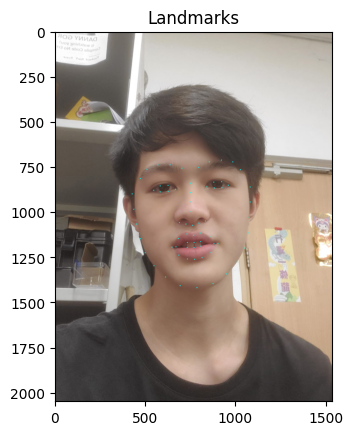

In [18]:
extracter = LandmarkExtractor("shape_predictor_68_face_landmarks.dat")
image = cv2.imread("img/me_without_mask4.jpg")
landmarks = extracter.get_landmarks(image, show=True)


In [19]:
# face_detector = dlib.get_frontal_face_detector()
# landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# img = dlib.load_rgb_image("img/me_without_mask4.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# faces = face_detector(img, 1)

# landmark_tuple = []
# for k, d in enumerate(faces):
#    landmarks = landmark_detector(img, d)
#    for n in range(0, 68):
#       x = landmarks.part(n).x
#       y = landmarks.part(n).y
#       landmark_tuple.append((x, y))
#       cv2.circle(img, (x, y), 2, (255, 255, 0), 3)
      
# plt_imshow("Facial Landmark", img)